In [93]:
from ocr.demo import img2latex, pdf2latex, postprocess
from ocr.model.img2seq import Img2SeqModel
from ocr.model.utils.general import Config, run
from ocr.model.utils.text import Vocab
from IPython.display import Image, display, Math, Latex
from wand.image import Image as WImage
from variable_extractor import get_variables, unparse
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
from lxml import etree
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [88]:
dir_output = "/home/paulluh/im2latex_weights/1/"
config_vocab = Config(dir_output + "vocab.json")
config_model = Config(dir_output + "model.json")
vocab = Vocab(config_vocab)

model = Img2SeqModel(config_model, dir_output, vocab)
model.build_pred()
model.restore_session(dir_output + "model.weights/")

Building model...
- done.
Reloading the latest trained model...


INFO:tensorflow:Restoring parameters from /home/paulluh/im2latex_weights/1/model.weights/


Restoring parameters from /home/paulluh/im2latex_weights/1/model.weights/


## OCR for math equations.

Pixel Dimensions: (44, 220, 3)
/home/paulluh/equation-parser/tmp/1-11.png


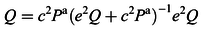

{{Q}}=c^{2}{P}^{a}(e^{\gamma }{O}+{2}{P}^{a})^{-l}e^{2}{Q}


<IPython.core.display.Math object>

In [99]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    iaa.GammaContrast(2.5)
])

latex, _, img_path = img2latex(model, 'ocr/data/sandbox/1-11.png', downsample_image_ratio=1.8108, cropping=True, padding=True, gray_scale=True,
                              img_augment=seq)
print(img_path)
display(Image(img_path))
latex = postprocess(latex)
print(latex)
display(Math(latex))

## Extract variables from math equations

In [103]:
variables = set()
candidates = get_variables(latex)
for v in candidates:
    if isinstance(v, etree._Element):
        variables.add(
            unparse(v)
        )
    else:
        variables.add(
            v
        )
print('Variables:')
for i in list(variables):
    display(Math(i))


Variables:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>